In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Stress-Lysis.csv')

In [ ]:
df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [8]:
for column in df.columns:
    print("Unique Columns:",column)
    print(df[column].unique())
    print()

Unique Columns: Humidity
[21.33 21.41 27.12 ... 27.22 12.46 16.87]

Unique Columns: Temperature
[90.33 90.41 96.12 ... 96.22 81.46 85.87]

Unique Columns: Step_count
[123  93 196 177  87  40  88 162  61 168 200 117 179  55 148 169 135 149
 122 131  43  79 153  21 147  30 105 127 172 190 144 121 134  29 104 150
  59 110 181  25 129 109 157  33  98 174  11  94 163  44  18 185 119  24
 100 102 173 195 128 136 112  38 171 197 160   6  42  10 138 186   7  54
  81 139  72 116  86  31  60  22 176  34 166 133 189 101 126  84  46 120
  76  49 118 193 115  73 199  52 187 178 130 106 161 145 146 164 194  95
 155 137 158 111   1  28  51  71  66 198  17   2  89 191 142 159 167  45
 175 156  19  27  58 151   4  74  65  41  37  92  90 103  57  78 182  16
 141 170  56  85  64  99  13 113 125  97  67 114   5   8 107  20 108 183
 140  63  14  68 188  96  53  75   3  23 165  36  35 152  69 192  47  77
  26  50  80 132  39  82  48 143 180 154 184  15  32 124  12   9  70  83
  62   0  91]

Unique Columns: 

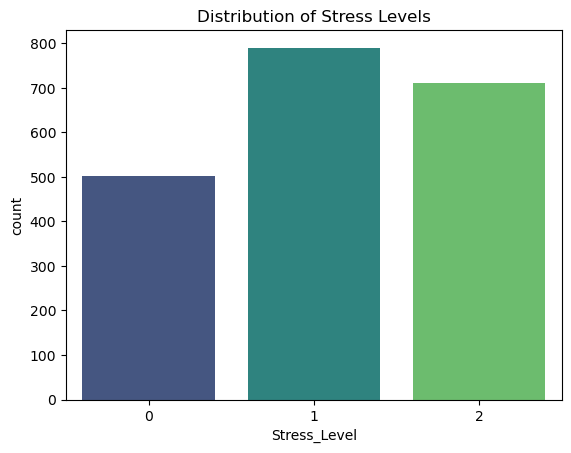

In [9]:
sns.countplot(x='Stress_Level', data=df, palette='viridis')
plt.title('Distribution of Stress Levels')
plt.show()

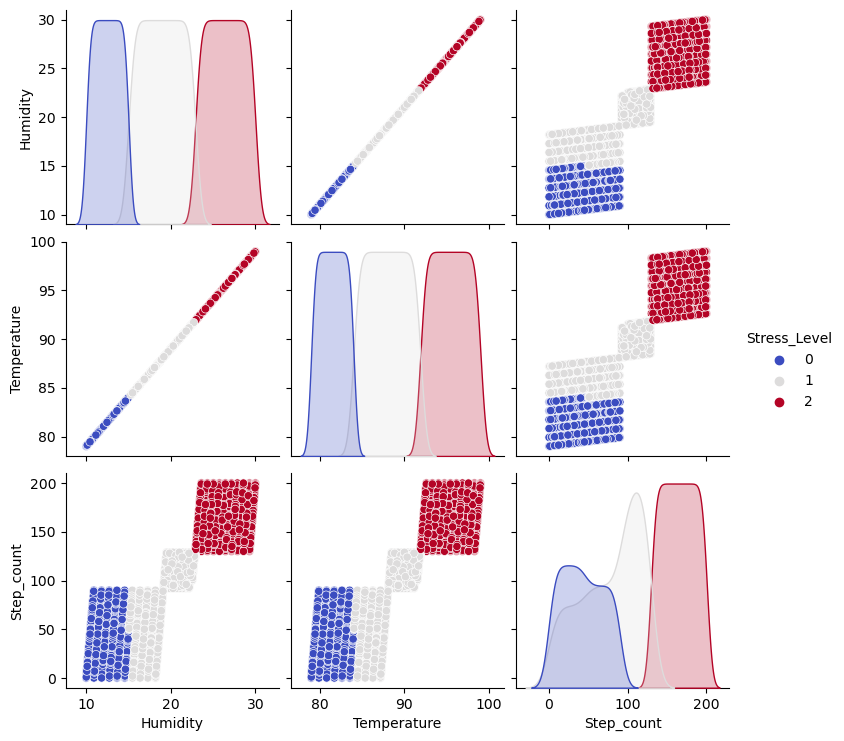

In [10]:
sns.pairplot(df, hue='Stress_Level', palette='coolwarm')
plt.show()

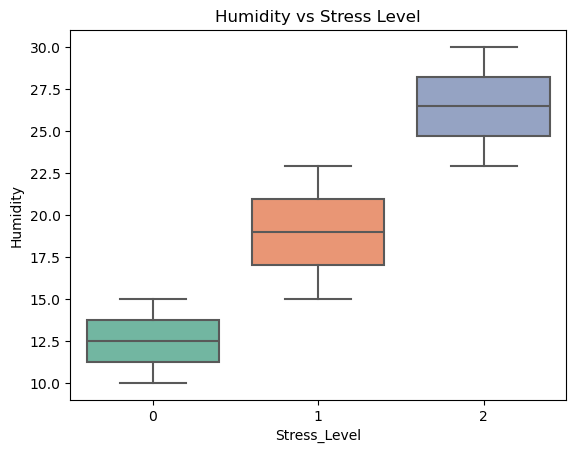

In [12]:
sns.boxplot(x='Stress_Level', y='Humidity', data=df, palette='Set2')
plt.title('Humidity vs Stress Level')
plt.show()

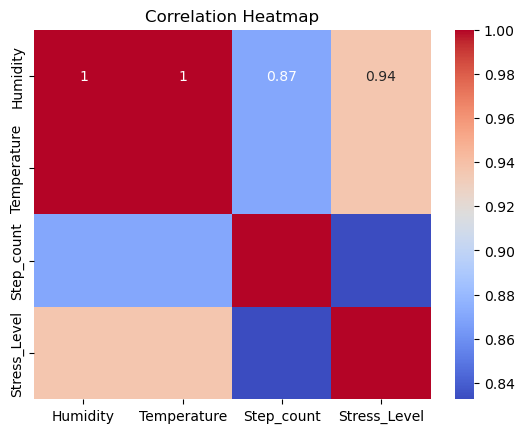

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

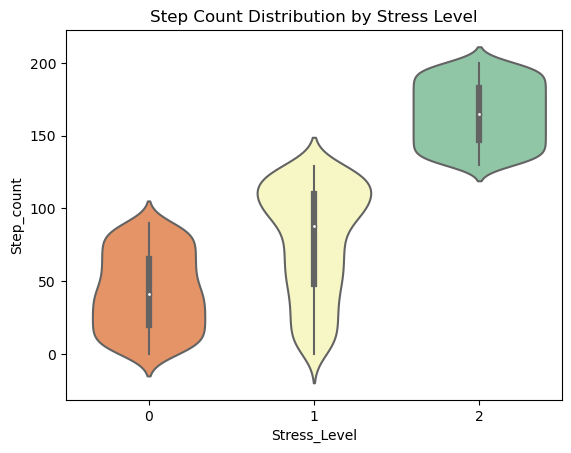

In [14]:
sns.violinplot(x='Stress_Level', y='Step_count', data=df, palette='Spectral')
plt.title('Step Count Distribution by Stress Level')
plt.show()


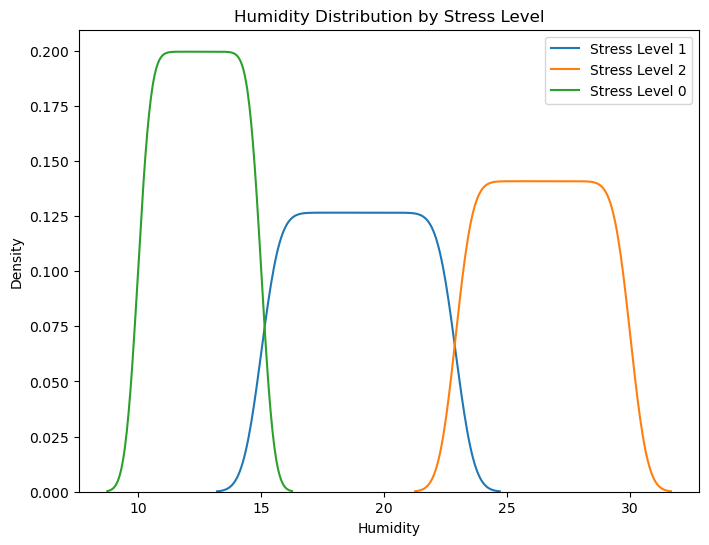

In [15]:
plt.figure(figsize=(8, 6))
for level in df['Stress_Level'].unique():
    sns.kdeplot(df[df['Stress_Level'] == level]['Humidity'], label=f'Stress Level {level}')
plt.title('Humidity Distribution by Stress Level')
plt.legend()
plt.show()


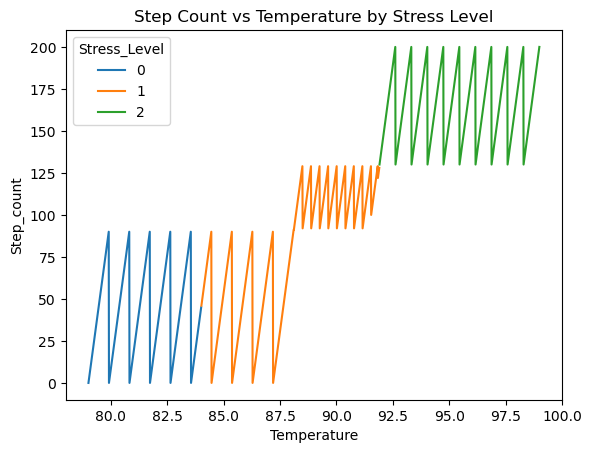

In [16]:
sns.lineplot(x='Temperature', y='Step_count', data=df, hue='Stress_Level', palette='tab10')
plt.title('Step Count vs Temperature by Stress Level')
plt.show()


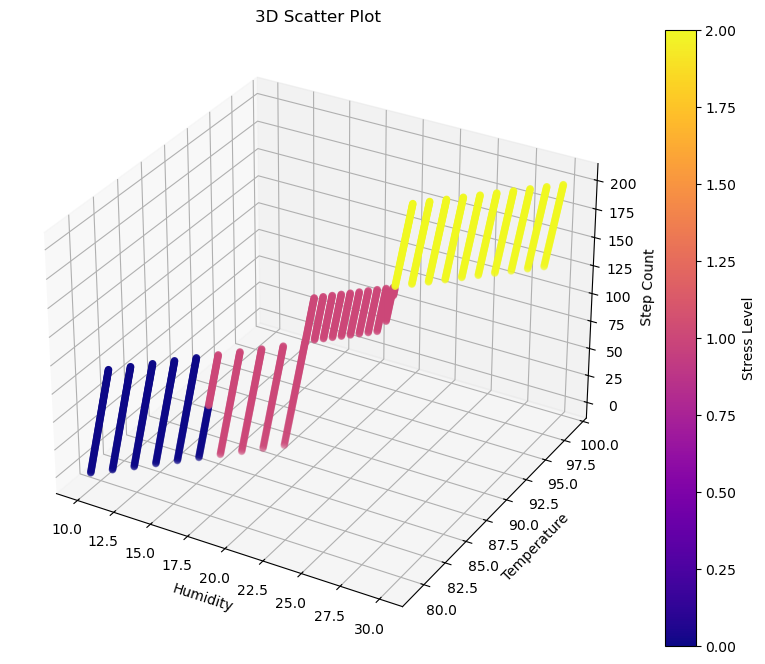

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Humidity'], df['Temperature'], df['Step_count'], c=df['Stress_Level'], cmap='plasma')
plt.colorbar(sc, label='Stress Level')
ax.set_xlabel('Humidity')
ax.set_ylabel('Temperature')
ax.set_zlabel('Step Count')
plt.title('3D Scatter Plot')
plt.show()


# Pivot Tables

In [20]:
pivot_temp_humidity = df.pivot_table(values=['Temperature', 'Humidity'], index='Stress_Level', aggfunc='mean')
print("Average Temperature and Humidity by Stress Level:\n", pivot_temp_humidity)


Average Temperature and Humidity by Stress Level:
               Humidity  Temperature
Stress_Level                       
0               12.500       81.500
1               18.955       87.955
2               26.455       95.455


In [21]:
df['Humidity_rounded'] = df['Humidity'].round(-1)  # Round to nearest 10
pivot_step_humidity = df.pivot_table(values='Step_count', index='Humidity_rounded', columns='Stress_Level', aggfunc='mean')
print("Step Count by Rounded Humidity and Stress Level:\n", pivot_step_humidity)


Step Count by Rounded Humidity and Stress Level:
 Stress_Level          0         1           2
Humidity_rounded                             
10.0              42.93       NaN         NaN
20.0              45.00  78.13038  164.514286
30.0                NaN       NaN  165.204000


In [22]:
df['Temp_bin'] = pd.cut(df['Temperature'], bins=5)  # Divide into 5 bins
pivot_max_step = df.pivot_table(values='Step_count', index='Temp_bin', columns='Stress_Level', aggfunc='max')
print("Max Step Count by Temperature Range and Stress Level:\n", pivot_max_step)


Max Step Count by Temperature Range and Stress Level:
 Stress_Level      0      1      2
Temp_bin                         
(78.98, 83.0]  90.0    NaN    NaN
(83.0, 87.0]   90.0   90.0    NaN
(87.0, 91.0]    NaN  129.0    NaN
(91.0, 95.0]    NaN  129.0  200.0
(95.0, 99.0]    NaN    NaN  200.0


In [23]:
df['Step_Bin'] = pd.cut(df['Step_count'], bins=4)
pivot_count = df.pivot_table(index='Stress_Level', columns='Step_Bin', aggfunc='size', fill_value=0)
print("Count of Records by Stress Level and Step Count Range:\n", pivot_count)


Count of Records by Stress Level and Step Count Range:
 Step_Bin      (-0.2, 50.0]  (50.0, 100.0]  (100.0, 150.0]  (150.0, 200.0]
Stress_Level                                                             
0                      301            200               0               0
1                      209            284             297               0
2                        0              0             210             500


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
df_processed = df.drop(columns=['Temp_bin', 'Step_Bin', 'Humidity_rounded'])

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [30]:
label_encoder = LabelEncoder()
df_processed['Stress_Level'] = label_encoder.fit_transform(df_processed['Stress_Level'])

In [31]:
X = df_processed.drop(columns='Stress_Level')
y = df_processed['Stress_Level']

In [32]:
X = X.select_dtypes(include=[np.number])

In [33]:
scaler_std = StandardScaler()
X_standard = scaler_std.fit_transform(X)

In [34]:
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import xgboost as xgb

# KNN

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN")
print(classification_report(y_test, y_pred_knn))


KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Gaussian NB

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("\nGaussian Naive Bayes")
print(classification_report(y_test, y_pred_gnb))



Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       1.00      0.99      0.99       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       0.99      1.00      0.99       401
weighted avg       1.00      1.00      1.00       401



# logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("\nLogistic Regression")
print(classification_report(y_test, y_pred_log))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# SVM

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM")
print(classification_report(y_test, y_pred_svm))


SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Decision Tree

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))



Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Ada Boost

In [45]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost")
print(classification_report(y_test, y_pred_ada))


AdaBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Gradient Boost

In [46]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boost")
print(classification_report(y_test, y_pred_gb))


Gradient Boost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# XG Boost

In [47]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb))


XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



# Observation

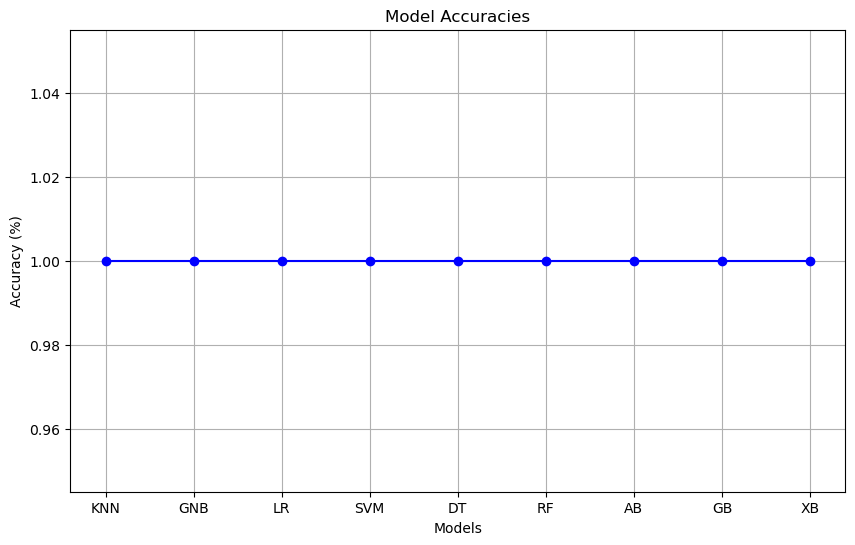

In [49]:
models = ['KNN', 'GNB', 'LR', 'SVM', 'DT', 'RF', 'AB','GB','XB']
accuracies = [1,1,1,1,1,1,1,1,1]
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()